In [4]:
# 코랩의 한글 설치... 실행 후 런타임 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (19.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


<Response [200]>
<class 'requests.models.Response'>

{'tbLnOpendataRtmsV': {'list_total_count': 5924, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'ACC_YEAR': '2021', 'SGG_CD': '11680', 'SGG_NM': '강남구', 'BJDONG_CD': '11200', 'BJDONG_NM': '자곡동', 'LAND_GBN': '1', 'LAND_GBN_NM': '대지', 'BONBEON': '0655', 'BUBEON': '0000', 'BLDG_NM': '\t강남 푸르지오시티 2차(PRUGIO CITYⅡ)\t', 'DEAL_YMD': '20220104', 'OBJ_AMT': '15000', 'BLDG_AREA': 22.44, 'TOT_AREA': 29.73, 'FLOOR': 7.0, 'RIGHT_GBN': '', 'CNTL_YMD': '', 'BUILD_YEAR': '2014', 'HOUSE_TYPE': '오피스텔', 'REQ_GBN': '중개거래', 'RDEALER_LAWDNM': '서울 강남구'}, {'ACC_YEAR': '2021', 'SGG_CD': '11680', 'SGG_NM': '강남구', 'BJDONG_CD': '10800', 'BJDONG_NM': '논현동', 'LAND_GBN': '1', 'LAND_GBN_NM': '대지', 'BONBEON': '0028', 'BUBEON': '0017', 'BLDG_NM': '논현아테나니케', 'DEAL_YMD': '20211231', 'OBJ_AMT': '165000', 'BLDG_AREA': 112.49, 'TOT_AREA': 86.54, 'FLOOR': 2.0, 'RIGHT_GBN': '', 'CNTL_YMD': '', 'BUILD_YEAR': '2004', 'HOUSE_TYPE': '연립다세대', 'REQ_GBN': '중개거래', 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_

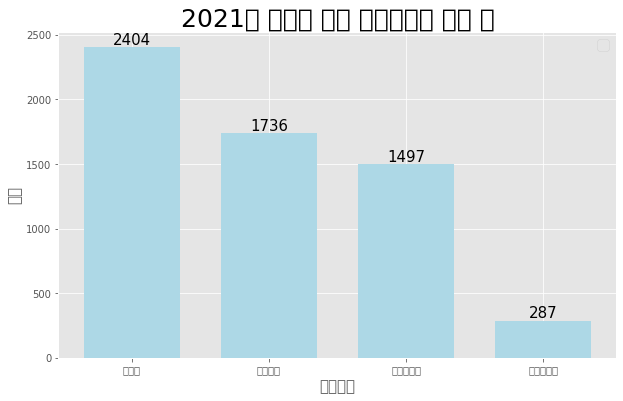

In [3]:
# houseCount.py

import pandas as pd
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# 서울시 부동산 실거래가 정보
# https://data.seoul.go.kr/dataList/OA-21275/S/1/datasetView.do #인자 및 변수 기술 문서

def houseCount():
     service_key = '43686c666373756e38316b4d697778' #Encoding인증키
     year='2021'
     # startPagenum = '' #추후 연도별로 보기 가능하도록 수정하기 위함
     # endPagenum = ''

     url1 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/1/1000/"+year+"/11680/강남구/"
     #한번에 1000건씩밖에 안 된다...ㅠㅠ
     url2 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/1001/2000/"+year+"/11680/강남구/"
     url3 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/2001/3000/"+year+"/11680/강남구/"
     url4 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/3001/4000/"+year+"/11680/강남구/"
     url5 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/4001/5000/"+year+"/11680/강남구/"
     url6 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/5001/5924/"+year+"/11680/강남구/"
     #2021년도 한정, 총 5924개 데이터가 나온다. 'list_total_count': 5924

     res1 = requests.get(url1) #json 파일 형식으로 받아오게 돼어 있음
     res2 = requests.get(url2)
     res3 = requests.get(url3)
     res4 = requests.get(url4)
     res5 = requests.get(url5)
     res6 = requests.get(url6)
     # res = requests.get(url).text
     # res = requests.get(url).content
     print(res1)
     print(type(res1))
     print('')
     res1_1 = json.loads(res1.text) #딕셔너리네
     res2_1 = json.loads(res2.text)
     res3_1 = json.loads(res3.text)
     res4_1 = json.loads(res4.text)
     res5_1 = json.loads(res5.text)
     res6_1 = json.loads(res6.text)

     print(res1_1)
     print(res2_1)
     print(type(res1_1))
     print('')

     res1_2 = res1_1['tbLnOpendataRtmsV']['row']
     res2_2 = res2_1['tbLnOpendataRtmsV']['row']
     res3_2 = res3_1['tbLnOpendataRtmsV']['row']
     res4_2 = res4_1['tbLnOpendataRtmsV']['row']
     res5_2 = res5_1['tbLnOpendataRtmsV']['row']
     res6_2 = res6_1['tbLnOpendataRtmsV']['row']

     df1 = pd.DataFrame(res1_2)
     df2 = pd.DataFrame(res2_2)
     df3 = pd.DataFrame(res3_2)
     df4 = pd.DataFrame(res4_2)
     df5 = pd.DataFrame(res5_2)
     df6 = pd.DataFrame(res6_2)

     resultDF = pd.concat([df1,df2,df3,df4,df5,df6]) #여섯 개 합치자

     resultDF.drop(['SGG_CD','SGG_NM','BJDONG_CD','LAND_GBN','LAND_GBN_NM','BONBEON','BUBEON','DEAL_YMD','RIGHT_GBN','CNTL_YMD','BUILD_YEAR','REQ_GBN','RDEALER_LAWDNM'],inplace=True,axis=1) # 시각화에 쓸모 없는 데이터 삭제
     resultDF.columns = ['접수연도','법정동명','건물명','물건금액(만원)','건물면적','토지면적','층','건물용도']
     resultDF.drop(['건물명','건물면적','토지면적','층'],inplace=True,axis=1) # 시각화에 쓸모 없는 데이터 삭제

     # 수량 카운트
     countResult = resultDF['건물용도'].value_counts()

     x = list(countResult.index)
     y = list(countResult.values)

    #  plt.rc('font', family='Malgun Gothic') #파이참
     plt.rc('font', family='NanumBarunGothic') #코랩
     plt.style.use('ggplot')
     plt.figure(figsize=(10,6))

     print(countResult)

     countResult = plt.bar(countResult.index,countResult.values,width=0.7,color='lightblue')

     for rect in countResult:
          height = rect.get_height()
          plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%d' % height, ha='center', va='bottom', size=15)

     plt.title('2021년 강남구 전체 건물용도별 건물 수',size=25)
     plt.xticks(size=10,rotation=0,weight='bold')
     plt.xlabel('건물용도',size=15)
     plt.ylabel('개수',size=15)
     plt.legend(fontsize=15)
     plt.show()

# 내가 나를(함수) 호출할때 이 파일이 __main__임.
if __name__ =='__main__':

    houseCount()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_

<Response [200]>
<class 'requests.models.Response'>

{'tbLnOpendataRtmsV': {'list_total_count': 5924, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'ACC_YEAR': '2021', 'SGG_CD': '11680', 'SGG_NM': '강남구', 'BJDONG_CD': '11200', 'BJDONG_NM': '자곡동', 'LAND_GBN': '1', 'LAND_GBN_NM': '대지', 'BONBEON': '0655', 'BUBEON': '0000', 'BLDG_NM': '\t강남 푸르지오시티 2차(PRUGIO CITYⅡ)\t', 'DEAL_YMD': '20220104', 'OBJ_AMT': '15000', 'BLDG_AREA': 22.44, 'TOT_AREA': 29.73, 'FLOOR': 7.0, 'RIGHT_GBN': '', 'CNTL_YMD': '', 'BUILD_YEAR': '2014', 'HOUSE_TYPE': '오피스텔', 'REQ_GBN': '중개거래', 'RDEALER_LAWDNM': '서울 강남구'}, {'ACC_YEAR': '2021', 'SGG_CD': '11680', 'SGG_NM': '강남구', 'BJDONG_CD': '10800', 'BJDONG_NM': '논현동', 'LAND_GBN': '1', 'LAND_GBN_NM': '대지', 'BONBEON': '0028', 'BUBEON': '0017', 'BLDG_NM': '논현아테나니케', 'DEAL_YMD': '20211231', 'OBJ_AMT': '165000', 'BLDG_AREA': 112.49, 'TOT_AREA': 86.54, 'FLOOR': 2.0, 'RIGHT_GBN': '', 'CNTL_YMD': '', 'BUILD_YEAR': '2004', 'HOUSE_TYPE': '연립다세대', 'REQ_GBN': '중개거래', 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46021 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s

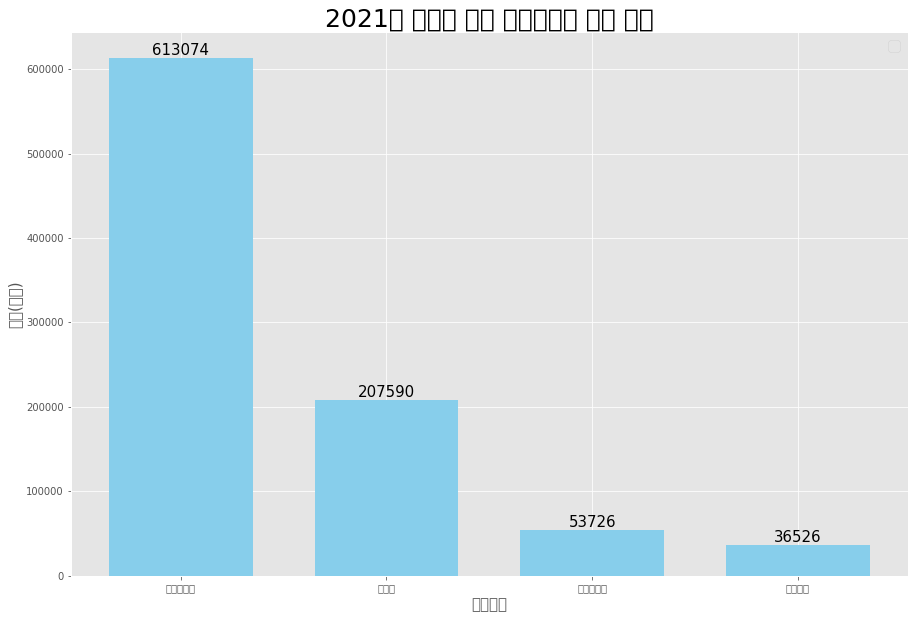

In [2]:
# houseMeanPrice.py

import pandas as pd
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# 서울시 부동산 실거래가 정보
# https://data.seoul.go.kr/dataList/OA-21275/S/1/datasetView.do #인자 및 변수 기술 문서

def houseMeanPrice():
     service_key = '43686c666373756e38316b4d697778' #Encoding인증키
     year='2021'
     # startPagenum = '' #추후 연도별로 보기 가능하도록 수정하기 위함
     # endPagenum = ''

     url1 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/1/1000/"+year+"/11680/강남구/"
     #한번에 1000건씩밖에 안 된다...ㅠㅠ
     url2 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/1001/2000/"+year+"/11680/강남구/"
     url3 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/2001/3000/"+year+"/11680/강남구/"
     url4 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/3001/4000/"+year+"/11680/강남구/"
     url5 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/4001/5000/"+year+"/11680/강남구/"
     url6 = "http://openapi.seoul.go.kr:8088/"+service_key+"/json/tbLnOpendataRtmsV/5001/5924/"+year+"/11680/강남구/"
     #2021년도 한정, 총 5924개 데이터가 나온다. 'list_total_count': 5924

     res1 = requests.get(url1) #json 파일 형식으로 받아오게 돼어 있음
     res2 = requests.get(url2)
     res3 = requests.get(url3)
     res4 = requests.get(url4)
     res5 = requests.get(url5)
     res6 = requests.get(url6)
     # res = requests.get(url).text
     # res = requests.get(url).content
     print(res1)
     print(type(res1))
     print('')
     res1_1 = json.loads(res1.text) #딕셔너리네
     res2_1 = json.loads(res2.text)
     res3_1 = json.loads(res3.text)
     res4_1 = json.loads(res4.text)
     res5_1 = json.loads(res5.text)
     res6_1 = json.loads(res6.text)

     print(res1_1)
     print(res2_1)
     print(type(res1_1))
     print('')

     res1_2 = res1_1['tbLnOpendataRtmsV']['row']
     res2_2 = res2_1['tbLnOpendataRtmsV']['row']
     res3_2 = res3_1['tbLnOpendataRtmsV']['row']
     res4_2 = res4_1['tbLnOpendataRtmsV']['row']
     res5_2 = res5_1['tbLnOpendataRtmsV']['row']
     res6_2 = res6_1['tbLnOpendataRtmsV']['row']

     df1 = pd.DataFrame(res1_2)
     df2 = pd.DataFrame(res2_2)
     df3 = pd.DataFrame(res3_2)
     df4 = pd.DataFrame(res4_2)
     df5 = pd.DataFrame(res5_2)
     df6 = pd.DataFrame(res6_2)

     resultDF = pd.concat([df1,df2,df3,df4,df5,df6]) #여섯 개 합치자

     resultDF.drop(['SGG_CD','SGG_NM','BJDONG_CD','LAND_GBN','LAND_GBN_NM','BONBEON','BUBEON','DEAL_YMD','RIGHT_GBN','CNTL_YMD','BUILD_YEAR','REQ_GBN','RDEALER_LAWDNM'],inplace=True,axis=1) # 시각화에 쓸모 없는 데이터 삭제
     resultDF.columns = ['접수연도','법정동명','건물명','물건금액(만원)','건물면적','토지면적','층','건물용도']
     resultDF.drop(['건물명','건물면적','토지면적','층'],inplace=True,axis=1) # 시각화에 쓸모 없는 데이터 삭제

     resultDF['물건금액(만원)'] = pd.to_numeric(resultDF['물건금액(만원)'])  # 가격 str to int
     # resultDF
     grouped = resultDF['물건금액(만원)'].groupby(resultDF['건물용도'])
     meanResult=grouped.mean()#평균
     # meanResult

     x = list(meanResult.index)
     y = list(meanResult.values)

    #  plt.rc('font', family='Malgun Gothic') #파이참
     plt.rc('font', family='NanumBarunGothic') #코랩
     plt.style.use('ggplot')
     plt.figure(figsize=(15,10))

     print(meanResult)

     result = plt.bar(meanResult.index,meanResult.values,width=0.7,color='skyblue')

     for rect in result:
          height = rect.get_height()
          plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%d' % height, ha='center', va='bottom', size=15)

     plt.title('2021년 강남구 전체 건물용도별 평균 가격',size=25)
     plt.xticks(size=10,rotation=0,weight='bold')
     plt.xlabel('건물용도',size=15)
     plt.ylabel('가격(만원)',size=15)
     plt.legend(fontsize=15)
     plt.show()

# 내가 나를(함수) 호출할때 이 파일이 __main__임.
if __name__ =='__main__':

    houseMeanPrice()